# Heart Failure Prediction


DATA GATHERING AND CLEANING

In [1]:
#Importing dependencies
import pandas as pd  # for importing data
import numpy as np  #numerical computation   
import seaborn as sns #visalisation

df = pd.read_csv('heart.csv')  #reading the csv file

In [2]:
df.head()  #print the dataset

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
df.columns  ##print the columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [4]:
df.shape   #view shape

(918, 12)

In [5]:
df.describe()    #brief description of dataset parameters

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [6]:
df.info

<bound method DataFrame.info of      Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0     40   M           ATA        140          289          0     Normal   
1     49   F           NAP        160          180          0     Normal   
2     37   M           ATA        130          283          0         ST   
3     48   F           ASY        138          214          0     Normal   
4     54   M           NAP        150          195          0     Normal   
..   ...  ..           ...        ...          ...        ...        ...   
913   45   M            TA        110          264          0     Normal   
914   68   M           ASY        144          193          1     Normal   
915   57   M           ASY        130          131          0     Normal   
916   57   F           ATA        130          236          0        LVH   
917   38   M           NAP        138          175          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisea

In [7]:
df.isnull().sum()  #check for NaN values

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [8]:
df['Age'].is_unique  # check if Age is unique

False

VISUALISATION USING SEABORN LIBRARY

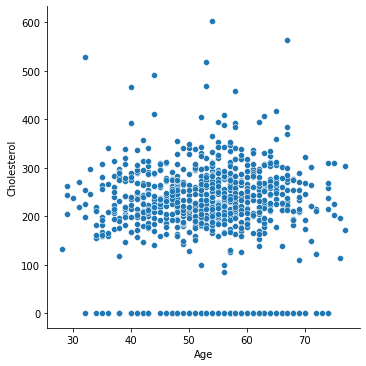

In [9]:
sns.relplot(x ="Age", y ="Cholesterol", data = df) #A plot of age against cholestrol

In [10]:
df #view dataset

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [11]:
df.RestingECG.count()   #count the rows of RestingECG

918

DATA TRANSFORMATION

In [12]:
#DATA TRANSFORMATAION CHANGES ALL CATEGORICAL VALUES SUCH AS SEX INTO DISCRETE/CONTINUOUS VALUES

#Transform Sex
def transformSex(row):
    if(row.Sex == 'M'): #MALE
        return 1
    elif(row.Sex == 'F'): #FEMALE
        return -1
    else:
        return 0
df["Sex"] = df.apply(lambda row: transformSex(row),axis=1)


#Transform RestingECG
def transformrecg(row):
    if(row.RestingECG == 'Normal'): #NORMAL
        return 1
    elif(row.RestingECG == 'LVH'): #LVH
        return -1
    else:
        return 0 # ST
df["RestingECG"] = df.apply(lambda row: transformrecg(row),axis=1)

#TRANSFORM ExerciseAngina
def transformrecg(row):
    if(row.ExerciseAngina == 'Y'): #YES
        return 1
    elif(row.ExerciseAngina == 'N'): #NO
        return -1
    else:
        return 0 
df["ExerciseAngina"] = df.apply(lambda row: transformrecg(row),axis=1)

#TRANSFORM ST_SLOPE
def transformrecg(row):
    if(row.ST_Slope == 'Flat'): #FLAT
        return 1
    elif(row.ST_Slope == 'Up'): #UP
        return -1
    else:
        return 0 
df["ST_Slope"] = df.apply(lambda row: transformrecg(row),axis=1)

#Transform ChestPainType
def transformchesttype(row):
    if(row.ChestPainType == 'ATA'): #ATA
        return 1
    elif(row.ChestPainType == 'NAP'): #NAP
        return -1
    else:                #ASY
        return 0 
df["ChestPainType"] = df.apply(lambda row: transformchesttype(row),axis=1)

In [13]:
df.head(100)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,-1,0.0,-1,0
1,49,-1,-1,160,180,0,1,156,-1,1.0,1,1
2,37,1,1,130,283,0,0,98,-1,0.0,-1,0
3,48,-1,0,138,214,0,1,108,1,1.5,1,1
4,54,1,-1,150,195,0,1,122,-1,0.0,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
95,58,1,0,130,263,0,1,140,1,2.0,1,1
96,43,1,1,142,207,0,1,138,-1,0.0,-1,0
97,39,1,-1,160,147,1,1,160,-1,0.0,-1,0
98,56,1,0,120,85,0,1,140,-1,0.0,-1,0


#SPLITING DATA INTO Y_TRAIN AND X_TRAIN

In [14]:
X_train = df.iloc[:,:11]
y_train = df["HeartDisease"]
X_train

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,1,1,140,289,0,1,172,-1,0.0,-1
1,49,-1,-1,160,180,0,1,156,-1,1.0,1
2,37,1,1,130,283,0,0,98,-1,0.0,-1
3,48,-1,0,138,214,0,1,108,1,1.5,1
4,54,1,-1,150,195,0,1,122,-1,0.0,-1
...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,0,110,264,0,1,132,-1,1.2,1
914,68,1,0,144,193,1,1,141,-1,3.4,1
915,57,1,0,130,131,0,1,115,1,1.2,1
916,57,-1,1,130,236,0,-1,174,-1,0.0,1


Processing and Modelling 

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split( X_train, y_train, test_size=0.20, random_state=1 )

In [16]:
#FEATURE SCALING TO BRING DATA TO THE SAME FOOTING
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

Logistic Regression Model 

In [17]:
model = LogisticRegression(random_state=1)
model.fit(X_train,y_train)

model2 = model.predict(X_test)

In [18]:
model2

array([1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0], dtype=int64)

Confusion matrix and accuarcy score of linear regression model

In [19]:
from sklearn.metrics import confusion_matrix, accuracy_score
confusion_matrix(y_test, model2), accuracy_score(y_test, model2)


(array([[ 67,   7],
        [ 10, 100]], dtype=int64),
 0.907608695652174)

XGBOOST CLASSIFIER

In [20]:
import xgboost
from xgboost import XGBClassifier 
xgb = XGBClassifier(random_state = 120)
xgb.fit(X_train , y_train)

C:\Users\HP\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:48:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=120,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [21]:
xgbmodel = xgb.predict(X_test)

In [22]:
confusion_matrix(y_test, xgbmodel), accuracy_score(y_test, xgbmodel) #XGBOOST MODEL


(array([[64, 10],
        [14, 96]], dtype=int64),
 0.8695652173913043)

Gaussian Naïve Bayes MODEL

In [23]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

y_pred = gnb.predict(X_test) #prediction using GNB

In [24]:
confusion_matrix(y_test, y_pred ), accuracy_score(y_test, y_pred)

(array([[66,  8],
        [11, 99]], dtype=int64),
 0.8967391304347826)

Model Testing

In [25]:
Age = int(input('Enter patient age: '))
Sex = int(input('Enter sex (1 -for male, -1 for female): '))
ChestPainType = (input('Enter chest pain type (1 -for ATA, -1 for NAP, 0 -for ASY): '))
Cholesterol = int(input('Enter cholestrol: '))
RestingBP = int(input('Enter patient age: '))
FastingBS = int(input('Enter FastingBS (0 or 1): '))
RestingBS = int(input('Enter RestingBS(0 or 1): '))
MaxHR	 = float(input('Enter Maximum heart rate: '))
ExerciseAngina = float(input('Enter exercise angina (1 -for yes, -1 for No): '))

Oldpeak = int(input('Enter old peak: '))
ST_Slope = int(input('Enter st slope (1 -for FLAT, -1 for UP, 0 -for OTHER): '))

Enter patient age: 1
Enter sex (1 -for male, -1 for female): 1
Enter chest pain type (1 -for ATA, -1 for NAP, 0 -for ASY): 1
Enter cholestrol: 1
Enter patient age: 1
Enter FastingBS (0 or 1): 1
Enter RestingBS(0 or 1): 1
Enter Maximum heart rate: 1
Enter exercise angina (1 -for yes, -1 for No): 1
Enter old peak: 1
Enter st slope (1 -for FLAT, -1 for UP, 0 -for OTHER): 1


In [26]:
testing = model.predict([[Age,Sex,ChestPainType,Cholesterol,RestingBP,RestingBS,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ST_Slope]])
testing

C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)


array([1], dtype=int64)